# Beamforming

Sławomir Górawski

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]  # Larger images

## Task 1

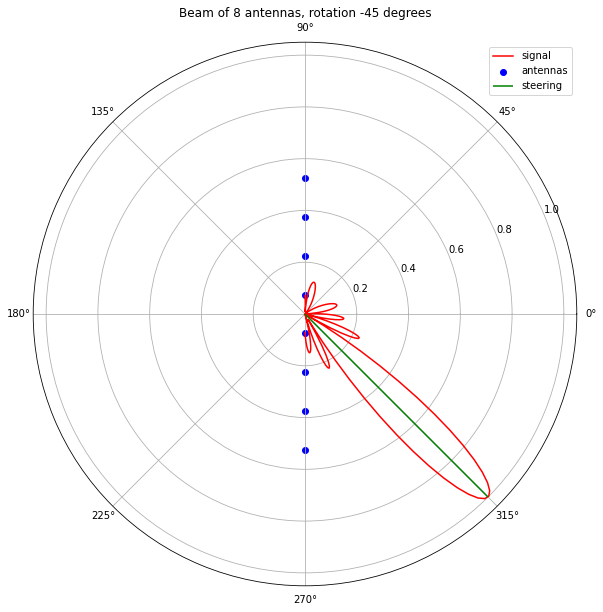

In [3]:
# Wave parameters - frequency, length etc.
f = 1e9 
c = 3e8
l = c / f
# Configurable beam angle
rotation_deg = -45
phi = np.radians(rotation_deg)

# Distance between antennas - half of wavelength
d = l / 2
num_antennas = 8
theta = np.linspace(-np.pi / 2, np.pi / 2, 180)
r = np.zeros(len(theta), dtype=np.complex128)
for n in range(num_antennas):
    r += np.exp(-1j * n * (2 * np.pi * d / l * np.sin(theta - phi)))

plt.polar(theta, np.abs(r) / num_antennas, color='r', label="signal")

# Plot antennas
if num_antennas % 2 == 1:
    plt.scatter([0], [0], color='b')
antennas = np.arange(num_antennas // 2) * d + (d / 2 if num_antennas % 2 == 0 else d)
plt.scatter(np.full(num_antennas // 2, np.pi / 2), antennas, color='b', label="antennas")
plt.scatter(np.full(num_antennas // 2, 3 * np.pi / 2), antennas, color='b')
plt.vlines(phi, 0, 1, color='g', label="steering")
plt.title(f"Beam of {num_antennas} antennas, rotation {rotation_deg} degrees")
plt.legend();

## Task 2

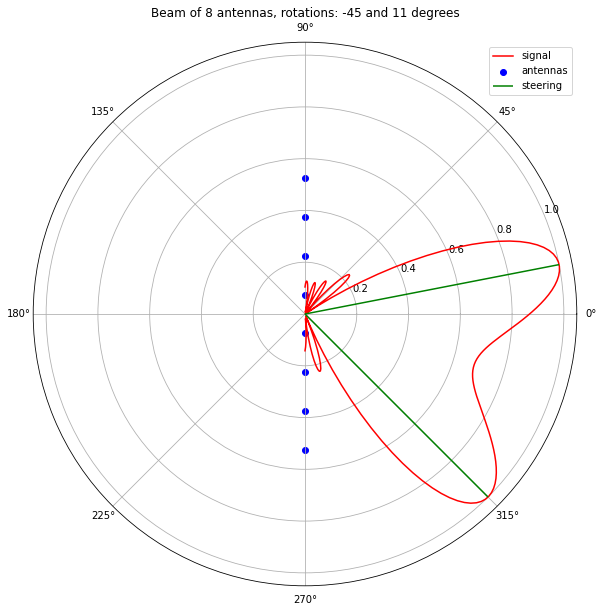

In [4]:
# Wave parameters - frequency, length etc.
f = 1e9 
c = 3e8
l = c / f
# Configurable beam angle
rotation_deg1 = -45
rotation_deg2 = 11
phi1 = np.radians(rotation_deg1)
phi2 = np.radians(rotation_deg2)

# Distance between antennas - half of wavelength
d = l / 2
num_antennas = 8
theta = np.linspace(-np.pi / 2, np.pi / 2, 180)
r = np.zeros(len(theta), dtype=np.complex128)
for n in range(num_antennas):
    rot = np.pi / 2 + (phi1 + phi2) / 2
    base = np.exp(-1j * n * 2 * np.pi * d / l * np.sin(theta - rot))
    steering = np.exp(-1j * n * np.radians(159))
    r += base * steering

plt.polar(theta, np.abs(r) / num_antennas, color='r', label="signal")

# Plot antennas
if num_antennas % 2 == 1:
    plt.scatter([0], [0], color='b')
antennas = np.arange(num_antennas // 2) * d + (d / 2 if num_antennas % 2 == 0 else d)
plt.scatter(np.full(num_antennas // 2, np.pi / 2), antennas, color='b', label="antennas")
plt.scatter(np.full(num_antennas // 2, 3 * np.pi / 2), antennas, color='b')
plt.vlines([phi1, phi2], 0, 1, color='g', label="steering")
plt.title(f"Beam of {num_antennas} antennas, rotations: {rotation_deg1} and {rotation_deg2} degrees")
plt.legend();